<a href="https://colab.research.google.com/github/MohitPunasiya/EE_769-Introduction-to-ML/blob/main/A3_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data loading 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataClustering.csv') 

In [ ]:
df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


#Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36586a690>,
      dtype=object)

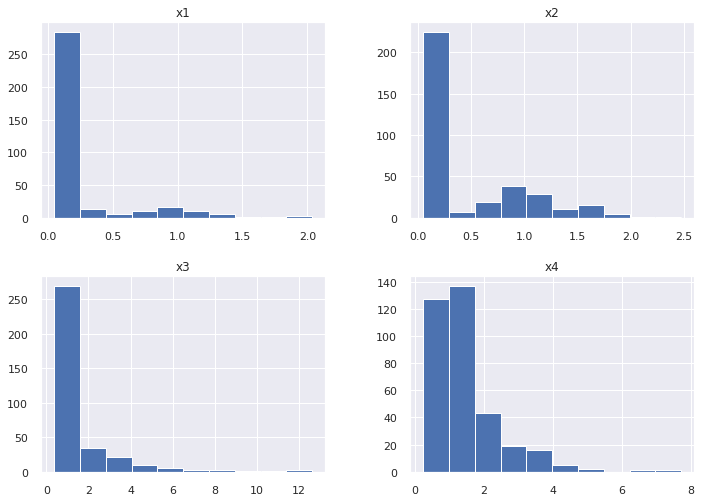

In [ ]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa365669810>,
      dtype=object)

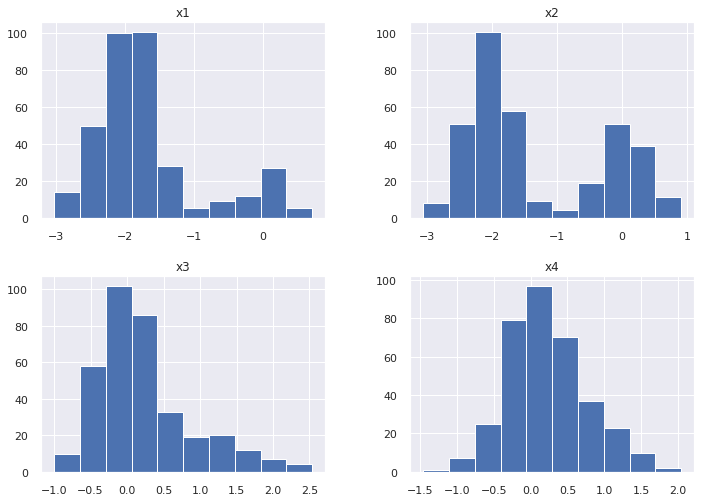

In [ ]:
df_log = np.log(df)
np.log(df).hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa36566ba90>,
      dtype=object)

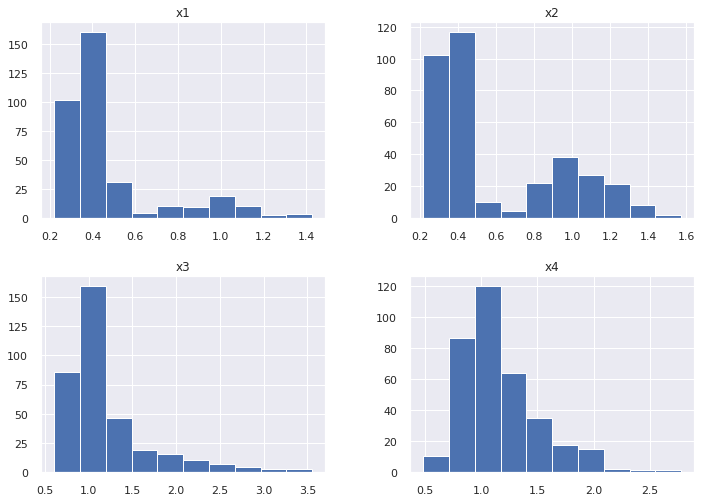

In [ ]:
df_sqrt = np.sqrt(df) #power transform
np.sqrt(df).hist()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D   #https://likegeeks.com/3d-plotting-in-python/
def threeD_plot(df,X,Y,Z):      #to make three D plots
  fig = plt.figure(figsize=(4,4))
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(xs = df[X], ys = df[Y], zs = df[Z])
  ax.set_title(X+' vs '+Y+' vs '+Z)

<Figure size 288x288 with 0 Axes>

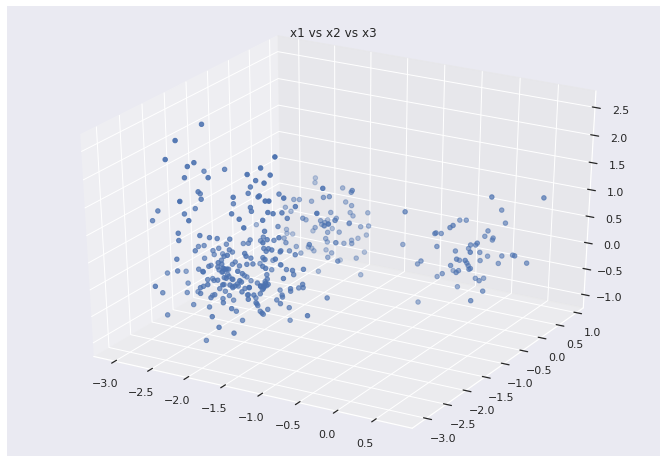

<Figure size 288x288 with 0 Axes>

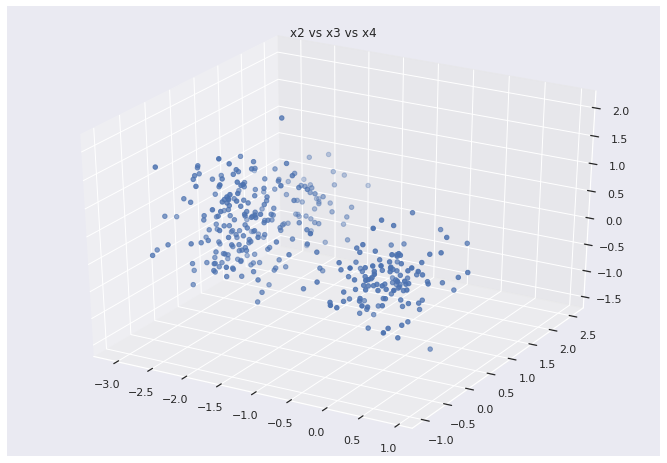

<Figure size 288x288 with 0 Axes>

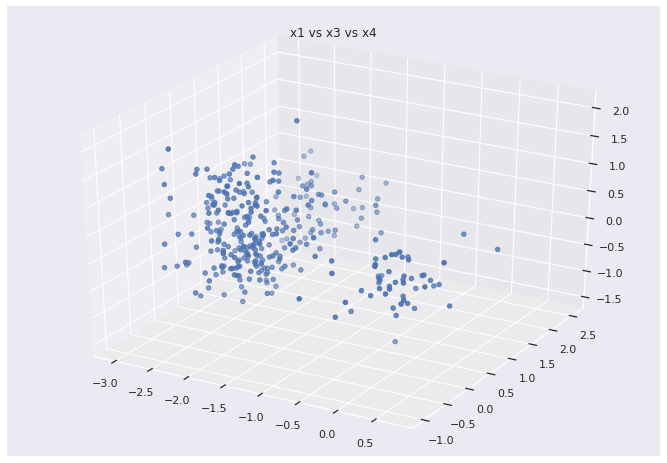

In [ ]:
threeD_plot(df_log,'x1','x2','x3')
threeD_plot(df_log,'x2','x3','x4')
threeD_plot(df_log,'x1','x3','x4')
#looking at the 3d plots below we can get some intution that atleast there are 4 different classes

#Dendrogram, hierarchical clustering

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(df_log,color_threshold=3)
fig.update_layout(width=1100, height=500)
fig.show()
#https://plotly.com/python/dendrogram/
#looking at the below dendrogram clearly 5 clusters can be seen

#Elbow Method to decide number of cluster

In [ ]:
from sklearn.cluster import KMeans
df_ = df_log.copy()
K = range(1,10)
WSS = [] #within cluster sum of square<which is sum of euclidiean distance of each point from its cluster center>
for k in K:
    kmeans = KMeans(n_clusters = k ).fit(df_log)
    centroids = kmeans.cluster_centers_
    preds = kmeans.predict(df_log)
    df_['preds'] = preds
    score = 0
    for i in range(0,k):
        score = score + np.sum(np.sqrt(((df_.groupby('preds').get_group(i).drop('preds',axis=1)-centroids[i])**2).sum(axis=1)))
    WSS.append(score)
  #https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb#:~:text=Calculate%20the%20Within%2DCluster%2DSum,Errors%20sounds%20a%20bit%20complex.

Text(0.5, 1.0, 'K vs WSS')

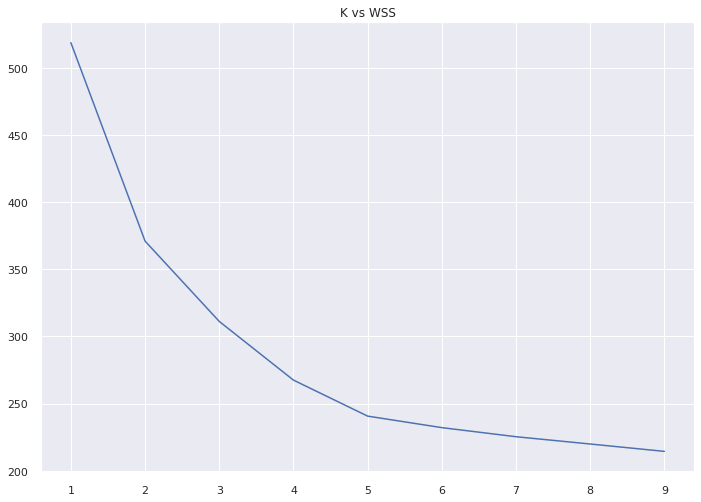

In [ ]:
plt.plot(K,WSS)
plt.title('K vs WSS')
## we can take k = 5 as we see some sort of elbow there knee

#Silhouette Score for number of cluster 

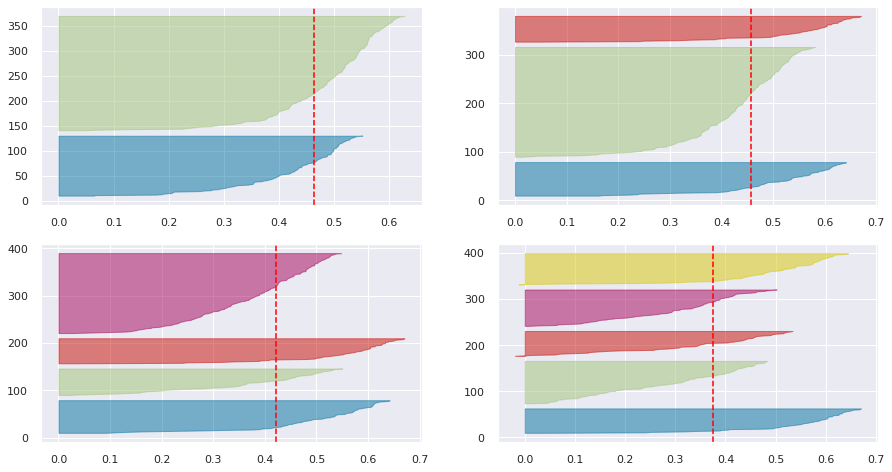

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k_ in [2, 3, 4, 5]:
    Kmeans = KMeans(n_clusters=k_, init='k-means++', n_init=10, max_iter=100, random_state=42) 
    n, m = divmod(k_, 2)
    visualizer = SilhouetteVisualizer(Kmeans, colors='yellowbrick', ax=ax[n-1][m])
    visualizer.fit(df_log)
#https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam


 





*   To choose optimum number of cluster following observation can be made
the thickness of each cluster seems to be equally distributed in bottom right that is for N_cluster = 5

*   The silhouette score for each cluster is more than the average silhouette score,

*   The difference in mean silhouette score between all the four cases is not that significant
*   Thus based upon this we can say k = 5 can be taken as an appropriate number of clusters





#Clustering and t-sne visualisation

In [ ]:
#BestK
kmeans = KMeans(n_clusters = 5 ).fit(df_log)
pred = kmeans.predict(df_log)
#https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=35, metric='euclidean',n_iter=15000)
embs = tsne.fit_transform(df_log)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
t_sne = pd.DataFrame(embs,columns = ['D1','D2'])
t_sne['cluster'] = pred

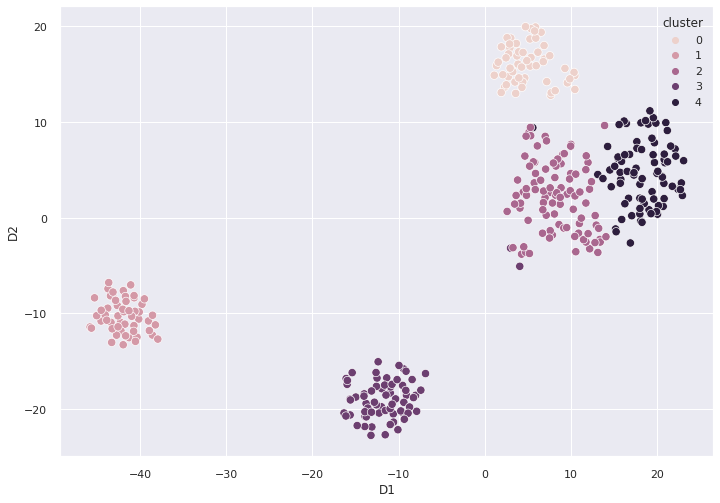

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='D1',y = 'D2',hue = 'cluster',data = t_sne,s =70)
#https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1